In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Use Selenium to Scrape Property Data

In [2]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

[WDM] - Downloading: 100%|█████████████████| 7.40M/7.40M [00:00<00:00, 8.07MB/s]


In [3]:
url = 'https://victoriamarket.ca/sold/victoria-home-sales'

In [4]:
driver.get(url)

In [10]:
properties = []

In [11]:
def grab_property_data():
    global properties
    content = driver.page_source
    soup = BeautifulSoup(content)
    props_odd = soup.find_all(class_='odd')
    props_even = soup.find_all(class_='even')
    properties = properties + props_odd + props_even

In [96]:
grab_property_data()

In [97]:
len(properties)

15062

In [98]:
properties[0]

<tr class="odd" role="row"><td style="display: none;">927966</td><td class="column-address dtr-control">1034 Johnson St # 803, Victoria BC V8V 3N7</td><td>Vi Downtown</td><td class="text-right">$590,000</td><td class="red-highlight text-right">$585,000</td><td class="text-right">2</td><td class="text-right" style="display: none;">2</td><td class="text-right">1,134 sf.</td><td class="text-right" style="display: none;">1,107 sf.</td><td class="text-right" style="display: none;">1983</td><td>2023-04-11</td><td class="text-right">51</td><td class="sorting_1">2023-07-10</td><td style="display: none;">Corner Lot, Rectangular Lot, Serviced</td><td style="display: none;">City</td><td style="display: none;">Pemberton Holmes - Cloverdale</td><td style="display: none;">RE/MAX Camosun</td></tr>

#### Pull property data from scraped data

In [100]:
property_detail_list = []

for property in properties:
    prop = property.find_all('td')
    p_list = []
    details = {}
    
    for p in prop:
        p_list.append(p.get_text())
    
    details = {'MLS#':p_list[0], 'Address':p_list[1], 'Area':p_list[2], 'Sold_date':p_list[12], 'Price':p_list[4], 'Beds':p_list[5], 'Baths':p_list[6], 'Sqft':p_list[7], 'Lot':p_list[8], 'Built':p_list[9], 'Desc':p_list[13]}
    
    property_detail_list.append(details)

In [103]:
vic_prop_df = pd.DataFrame(property_detail_list)

In [37]:
vic_prop_df = prop_df

In [38]:
drop_values = vic_prop_df.loc[vic_prop_df.Built == '-']
vic_prop_df = vic_prop_df.drop(drop_values.index)

In [39]:
def clean_data(x):
    
    x = x.replace('$', '')

    x = x.replace(',', '')

    x = x.replace('sf.', '')
    
    return x

In [40]:
vic_prop_df[['Price', 'Beds', 'Baths', 'Sqft', 'Lot', 'Built']] = vic_prop_df[['Price', 'Beds', 'Baths', 'Sqft', 'Lot', 'Built']].applymap(clean_data)

AttributeError: 'float' object has no attribute 'replace'

In [111]:
vic_prop_df[['Sqft', 'Price', 'Lot']] = vic_prop_df[['Sqft', 'Price', 'Lot']].astype(float)

In [123]:
vic_prop_df[['Beds', 'Baths', 'Built']] = vic_prop_df[['Beds', 'Baths', 'Built']].astype(int)

In [42]:
empty = (vic_prop_df.loc[vic_prop_df.Built == ''])
vic_prop_df = vic_prop_df.drop(empty.index)

In [43]:
vic_prop_df['Sold_date'] = pd.to_datetime(vic_prop_df['Sold_date'])

In [171]:
vic_prop_df.sort_values('Count', ascending=False)

,MLS#,Address,Area,Sold_date,Price,Beds,Baths,Sqft,Lot,Built,Desc,PC,House_type,Year,Month,Street_address,Street_num,Street_name,Count
564,923963,"770 Fisgard St # 502, Victoria BC V8W 0B8",Vi Downtown,2023-04-06,925000.0,2,2,1129.0,1129.0,2010,Irregular Lot,V8W,Condo,2023,4,770 Fisgard,770,Fisgard,157
4165,861133,"770 Fisgard St # 313, Victoria BC V8W 0B8",Vi Downtown,2021-01-07,410000.0,1,1,636.0,556.0,2010,Central Location,V8W,Condo,2021,1,770 Fisgard,770,Fisgard,157
3958,863549,"770 Fisgard St # 440, Victoria BC V8W 0B8",Vi Downtown,2021-01-25,575000.0,2,0,1021.0,929.0,2010,Rectangular Lot,V8W,Condo,2021,1,770 Fisgard,770,Fisgard,157
11352,717406,"770 Fisgard St # 330, Victoria BC V8W 0B8",Vi Downtown,2016-04-12,323900.0,1,1,723.0,723.0,2010,Rectangular Lot,V8W,Condo,2016,4,770 Fisgard,770,Fisgard,157
3931,855262,"770 Fisgard St # 435, Victoria BC V8W 3M9",Vi Downtown,2021-02-01,612500.0,2,2,938.0,938.0,2010,Rectangular Lot,V8W,Condo,2021,2,770 Fisgard,770,Fisgard,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11846,715554,"1442 Denman St, Victoria BC V8R 1X6",Vi Fernwood,2016-02-01,450000.0,2,2,1864.0,5227.0,1957,Rectangular Lot,V8R,House,2016,2,1442 Denman,1442,Denman,1
11847,716717,"3176 Fifth St, Victoria BC V8X 1E7",Vi Mayfair,2016-02-01,600000.0,3,2,2393.0,6837.0,1946,"Level, Rectangular Lot",V8X,House,2016,2,3176 Fifth,3176,Fifth,1
11848,717337,"2501 Avebury Ave, Victoria BC V8R 3W1",Vi Fernwood,2016-02-01,475000.0,2,1,2026.0,3227.0,1912,"Corner Lot, Level, Rectangular Lot, Wooded",V8R,House,2016,2,2501 Avebury,2501,Avebury,1
11850,718291,"1747 Emerson St, Victoria BC V8R 2C2",Vi Jubilee,2016-02-01,515000.0,4,2,2023.0,3150.0,1913,"Cleared, Level, Private, Rectangular Lot",V8R,House,2016,2,1747 Emerson,1747,Emerson,1


In [176]:
vic_prop_df[vic_prop_df.Count > 5]

,MLS#,Address,Area,Sold_date,Price,Beds,Baths,Sqft,Lot,Built,Desc,PC,House_type,Year,Month,Street_address,Street_num,Street_name,Count
0,927966,"1034 Johnson St # 803, Victoria BC V8V 3N7",Vi Downtown,2023-07-10,585000.0,2,2,1134.00,1107.0,1983,"Corner Lot, Rectangular Lot, Serviced",V8V,Condo,2023,7,1034 Johnson,1034,Johnson,28
1,934902,"755 Hillside Ave # 406, Victoria BC V8T 5B3",Vi Hillside,2023-07-10,415000.0,2,1,1088.00,1088.0,1982,Irregular Lot,V8T,Condo,2023,7,755 Hillside,755,Hillside,20
2,927416,"3160 Irma St # 106, Victoria BC V9A 1S8",Vi Burnside,2023-07-10,375000.0,1,1,892.00,774.0,1972,"Level, Private, Serviced",V9A,Condo,2023,7,3160 Irma,3160,Irma,7
3,931182,"1975 Lee Ave # 209, Victoria BC V8R 4W9",Vi Jubilee,2023-07-10,365000.0,1,1,642.71,617.0,1958,Rectangular Lot,V8R,Condo,2023,7,1975 Lee,1975,Lee,31
4,926214,"1170 Rockland Ave # 304, Victoria BC V8V 3H7",Vi Downtown,2023-07-07,565000.0,2,2,1064.00,981.0,1977,"Central Location, Easy Access, Recreation Near...",V8V,Condo,2023,7,1170 Rockland,1170,Rockland,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15009,645937,"647 Michigan St # 1507, Victoria BC V8V 1S9",Vi James Bay,2013-08-06,152000.0,0,1,450.00,450.0,1969,"Rectangular Lot, Serviced",V8V,Condo,2013,8,647 Michigan,647,Michigan,123
15011,643703,"1052 Rockland Ave # 304, Victoria BC V8V 3H5",Vi Downtown,2013-07-31,239000.0,2,2,1213.00,1077.0,1977,Irregular Lot,V8V,Condo,2013,7,1052 Rockland,1052,Rockland,9
15013,636474,"21 Erie St # 414, Victoria BC V8V 5A8",Vi James Bay,2013-07-31,389000.0,1,1,902.00,902.0,2004,Rectangular Lot,V8V,Condo,2013,7,21 Erie,21,Erie,57
15014,645377,"707 Courtney St # 901, Victoria BC V8W 0A9",Vi Downtown,2013-07-31,336500.0,1,1,803.00,803.0,2009,Irregular Lot,V8W,Condo,2013,7,707 Courtney,707,Courtney,93


In [141]:
vic_prop_df.to_csv('Vic_prop_listings.csv')

In [45]:
vic_prop_df['PC'] = vic_prop_df.Address.str.split('BC', expand=True)[1]

In [46]:
vic_prop_df['PC'] = vic_prop_df['PC'].str.split(' ', expand=True)[1]

In [78]:
vic_prop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15009 entries, 0 to 15016
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MLS#            15009 non-null  int64         
 1   Address         14975 non-null  object        
 2   Area            15009 non-null  object        
 3   Sold_date       15009 non-null  datetime64[ns]
 4   Price           15009 non-null  float64       
 5   Beds            15009 non-null  int64         
 6   Baths           15009 non-null  int64         
 7   Sqft            15009 non-null  float64       
 8   Lot             15009 non-null  float64       
 9   Built           15009 non-null  int64         
 10  Desc            13889 non-null  object        
 11  PC              14963 non-null  object        
 12  House_type      15009 non-null  object        
 13  Year            15009 non-null  int32         
 14  Month           15009 non-null  int32         
 15  Street_

In [62]:
vic_prop_df['Street_address'] = vic_prop_df.Address.str.split(',', expand=True)[0].str.split('#', expand=True)[0]

In [91]:
vic_prop_df.Street_address = vic_prop_df.Street_address.str.replace('johnson', 'Johnson')

In [104]:
vic_prop_df['Street_num'] = vic_prop_df.Street_address.str.split(' ', expand=True)[0]

In [108]:
vic_prop_df['Street_name'] = vic_prop_df.Street_address.str.split(' ', expand=True)[1].str.capitalize()

In [134]:
vic_prop_df.loc[(vic_prop_df.Street_name == 'Mt.'), 'Street_name'] = 'Mt. Stephen'

In [139]:
vic_prop_df.Street_address = vic_prop_df.Street_num + ' ' + vic_prop_df.Street_name


In [159]:
vic_prop_df = vic_prop_df.drop('Count', axis=1)

In [168]:
gbo = vic_prop_df.groupby('Street_address').Area

In [170]:
vic_prop_df['Count'] = gbo.transform('count')

In [49]:
vic_prop_df['House_type'] = 'House'

In [50]:
condo = vic_prop_df[(vic_prop_df.Sqft >= vic_prop_df.Lot)&(vic_prop_df.Address.str.contains('#\s\d+'))]

In [51]:
vic_prop_df.loc[condo.index, 'House_type'] = 'Condo'

In [52]:
vic_prop_df['Year'] = vic_prop_df['Sold_date'].dt.year

In [53]:
vic_prop_df['Month'] = vic_prop_df['Sold_date'].dt.month

In [72]:
empty = vic_prop_df.loc[vic_prop_df.Sqft == 0]
vic_prop_df = vic_prop_df.drop(empty.index)

### Data Analysis

In [160]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [164]:
ts_cv = TimeSeriesSplit(max_train_size=10000, test_size=1000)

In [504]:
X = vic_prop_df.drop(['MLS#', 'Address', 'Desc', 'Price', 'Sold_date'], axis=1)
y = vic_prop_df.Price

In [505]:
all_splits = list(ts_cv.split(X,y))

In [506]:
train_0, test_0 = all_splits[0]

In [507]:
X.iloc[train_0]

,Area,Beds,Baths,Sqft,Lot,Built,PC,Year,Month,House_type
0,Vi Downtown,2,2,1134.00,1107.0,1983,V8V,2023,7,Condo
1,Vi Hillside,2,1,1088.00,1088.0,1982,V8T,2023,7,Condo
2,Vi Burnside,1,1,892.00,774.0,1972,V9A,2023,7,Condo
3,Vi Jubilee,1,1,642.71,617.0,1958,V8R,2023,7,Condo
4,Vi Downtown,2,2,1064.00,981.0,1977,V8V,2023,7,Condo
...,...,...,...,...,...,...,...,...,...,...
10011,Vi James Bay,2,2,1684.00,1684.0,1991,V8V,2017,2,Condo
10012,Vi Downtown,1,1,624.00,624.0,2006,V8W,2017,2,Condo
10013,Vi Hillside,1,1,783.00,700.0,1990,V8T,2017,2,Condo
10014,Vi Central Park,1,1,731.00,731.0,2008,V8W,2017,2,Condo


In [182]:
area_cat = list(vic_prop_df.Area.value_counts().index)

In [184]:
pc_cat = list(vic_prop_df.PC.value_counts().index)

In [500]:
h_cat = list(vic_prop_df.House_type.value_counts().index)

In [501]:
categorical_columns = ['Area', 'PC', 'House_type']
categories = [area_cat, pc_cat, h_cat]

In [508]:
ordinal_encoder = OrdinalEncoder(categories=categories)

In [509]:
gbrt_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", ordinal_encoder, categorical_columns),
        ],
        remainder="passthrough",
        verbose_feature_names_out=False,
    ),
    HistGradientBoostingRegressor(
        categorical_features=categorical_columns,
        learning_rate=0.2,
        random_state=42,
    ),
).set_output(transform="pandas")

In [510]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error']
    )
    
    mae = -cv_results['test_neg_mean_absolute_error']
    rmse = -cv_results['test_neg_root_mean_squared_error']
    
    print(
        f"MAE: {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"RMSE: {rmse.mean():.3f} +/- {rmse.std():.3f}")
    
    return cv_results

In [511]:
 results = evaluate(gbrt_pipeline, X, y, cv=ts_cv)

MAE: 73072.147 +/- 8439.115
RMSE: 127918.777 +/- 11075.808


In [512]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [513]:
gbrt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(categories=[['Vi '
                                                                              'Downtown',
                                                                              'Vi '
                                                                              'James '
                                                                              'Bay',
                                                                              'Vi '
                                                                              'Fairfield '
                                                                              'West',
                                                                              'VW '
                                                                              'Victoria '
                                                                              'West',
                                                                              'Vi '
                                                                              'Oaklands',
                                                                              'Vi '
                                                                              'Jubilee',
                                                                              'Vi '
                                                                              'Hillside',
                                                                              'Vi '
                                                                              'Burnside',
                                                                              'Vi '
                                                                              'Fernwood',
                                                                              'Vi '
                                                                              'Fairfield '
                                                                              'East',
                                                                              'Vi '
                                                                              'Rockland',
                                                                              'Vi '
                                                                              'Central '
                                                                              'Park',
                                                                              'Vi '
                                                                              'May...
                                                                              'V9B',
                                                                              'V8Y',
                                                                              'V9C',
                                                                              'V8L',
                                                                              'V9Z',
                                                                              'V9V',
                                                                              'V8A',
                                                                              'V9R',
                                                                              'V8M',
                                                                              'V8B',
                                                                              'V9E',
                                                                              'V0R',
                                                                              'V9W',
                                                

In [514]:
pred = gbrt_pipeline.predict(X_test)

In [515]:
X_test

,Area,Beds,Baths,Sqft,Lot,Built,PC,Year,Month,House_type
4104,Vi James Bay,0,1,481.0,425.0,1973,V8V,2021,2,Condo
1143,Vi Jubilee,2,2,1131.0,1291.0,1976,V8R,2022,7,Home
2488,Vi Downtown,1,1,562.0,562.0,2008,V8W,2021,10,Condo
9890,Vi Downtown,1,1,563.0,563.0,2017,V8W,2017,1,Condo
9626,Vi Downtown,1,1,607.0,607.0,2008,V8W,2017,3,Condo
...,...,...,...,...,...,...,...,...,...,...
12080,Vi Fairfield East,3,3,2283.0,5200.0,2015,V8S,2015,10,Home
13813,Vi Oaklands,2,1,1150.0,4950.0,1949,V8T,2014,8,Home
14034,Vi Fairfield West,4,2,2466.0,7182.0,1949,V8S,2014,7,Home
8446,Vi Downtown,1,1,536.0,568.0,2010,V8W,2017,11,Home


In [516]:
results_df = pd.DataFrame(y_test)

In [517]:
results_df['Pred'] = np.round(pred, 0)

In [518]:
results_df

,Price,Pred
4104,270000.0,305524.0
1143,675000.0,561199.0
2488,428000.0,450699.0
9890,424900.0,376177.0
9626,354000.0,372832.0
...,...,...
12080,959000.0,1031697.0
13813,399000.0,449075.0
14034,849000.0,653050.0
8446,362500.0,340154.0


In [519]:
print(f"${np.round(np.sqrt(mean_squared_error(y_test, pred)), 2)}")

$145638.34


In [1]:
from joblib import dump, load

In [302]:
dump(gbrt_pipeline, 'vic_housing_prediction_gbrmodel.joblib')

['vic_housing_prediction_gbrmodel.joblib']

In [2]:
model = load('vic_housing_prediction_gbrmodel.joblib')

In [3]:
columns = load('vic_housing_columns.joblib')

In [4]:
columns

Index(['Area', 'Beds', 'Baths', 'Sqft', 'Lot', 'Built', 'PC', 'Year', 'Month',
       'House_type'],
      dtype='object')

In [308]:
X.Month

0        7
1        7
2        7
3        7
4        7
        ..
15056    7
15057    7
15058    7
15059    7
15060    7
Name: Month, Length: 14970, dtype: int32

In [26]:
data = ['Vi Downtown', 0, 1, 2000, 2000, 2020, 'V8W', 2023, 7, 'Condo']

In [537]:
X.columns

Index(['Area', 'Beds', 'Baths', 'Sqft', 'Lot', 'Built', 'PC', 'Year', 'Month',
       'House_type'],
      dtype='object')

In [538]:
X.PC.unique()

array(['V8V', 'V8T', 'V9A', 'V8R', 'V8S', 'V8W', 'V8Z', 'V8X', 'V8Y',
       'V9B', 'V9C', 'V8A', 'V9K', 'V3V', 'V9S', 'V8L', 'V9Y', 'V6V',
       'V8P', 'V9V', 'V8N', 'V9L', 'V6Z', 'V9W', 'V0R', 'V9Z', 'V8M',
       'V9R', 'V8D', 'V0N', 'V9E', 'V5R', 'V7X', 'V5Y', 'V8B', 'V9T',
       'V6S'], dtype=object)

In [539]:
X.Area.unique()

array(['Vi Downtown', 'Vi Hillside', 'Vi Burnside', 'Vi Jubilee',
       'Vi Rockland', 'Vi Oaklands', 'Vi James Bay', 'VW Victoria West',
       'Vi Mayfair', 'Vi Fairfield West', 'Vi Fernwood',
       'Vi Fairfield East', 'Vi Central Park'], dtype=object)

In [451]:
vic_prop_df.Baths.unique()

array([ 2,  1,  4,  3,  7,  5,  6,  0,  9,  8, 11, 10])

In [27]:
df = pd.DataFrame(data)

In [28]:
df = df.transpose()

In [29]:
df.columns = columns

In [30]:
model.predict(df)

array([2471202.2281487])

In [6]:
prop_df = pd.read_csv('Vic_prop_listings.csv')

In [8]:
prop_df = prop_df.drop('Unnamed: 0', axis=1)

In [9]:
prop_df

,MLS#,Address,Area,Sold_date,Price,Beds,Baths,Sqft,Lot,Built,Desc,PC,House_type,Year,Month,Street_address,Street_num,Street_name
0,927966,"1034 Johnson St # 803, Victoria BC V8V 3N7",Vi Downtown,2023-07-10,585000.0,2,2,1134.00,1107.0,1983,"Corner Lot, Rectangular Lot, Serviced",V8V,Condo,2023,7,1034 Johnson,1034,Johnson
1,934902,"755 Hillside Ave # 406, Victoria BC V8T 5B3",Vi Hillside,2023-07-10,415000.0,2,1,1088.00,1088.0,1982,Irregular Lot,V8T,Condo,2023,7,755 Hillside,755,Hillside
2,927416,"3160 Irma St # 106, Victoria BC V9A 1S8",Vi Burnside,2023-07-10,375000.0,1,1,892.00,774.0,1972,"Level, Private, Serviced",V9A,Condo,2023,7,3160 Irma,3160,Irma
3,931182,"1975 Lee Ave # 209, Victoria BC V8R 4W9",Vi Jubilee,2023-07-10,365000.0,1,1,642.71,617.0,1958,Rectangular Lot,V8R,Condo,2023,7,1975 Lee,1975,Lee
4,926214,"1170 Rockland Ave # 304, Victoria BC V8V 3H7",Vi Downtown,2023-07-07,565000.0,2,2,1064.00,981.0,1977,"Central Location, Easy Access, Recreation Near...",V8V,Condo,2023,7,1170 Rockland,1170,Rockland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,645388,"1725 Carrick St, Victoria BC V8R 2M1",Vi Jubilee,2013-07-31,434000.0,3,1,2022.00,7475.0,1949,Rectangular Lot,V8R,House,2013,7,1725 Carrick,1725,Carrick
14971,636474,"21 Erie St # 414, Victoria BC V8V 5A8",Vi James Bay,2013-07-31,389000.0,1,1,902.00,902.0,2004,Rectangular Lot,V8V,Condo,2013,7,21 Erie,21,Erie
14972,645377,"707 Courtney St # 901, Victoria BC V8W 0A9",Vi Downtown,2013-07-31,336500.0,1,1,803.00,803.0,2009,Irregular Lot,V8W,Condo,2013,7,707 Courtney,707,Courtney
14973,638821,"640 Montreal St # 102, Victoria BC V8V 1Z8",Vi James Bay,2013-07-31,452500.0,2,2,1106.00,1106.0,1981,"Dock/Moorage, Irregular Lot",V8V,Condo,2013,7,640 Montreal,640,Montreal


In [13]:
import plotly.offline as pyo
import plotly.graph_objects as go

In [16]:
data = [go.Scatter(x=prop_df['Price'], y=prop_df['Sqft'], )]
pyo.plot(data)

'temp-plot.html'

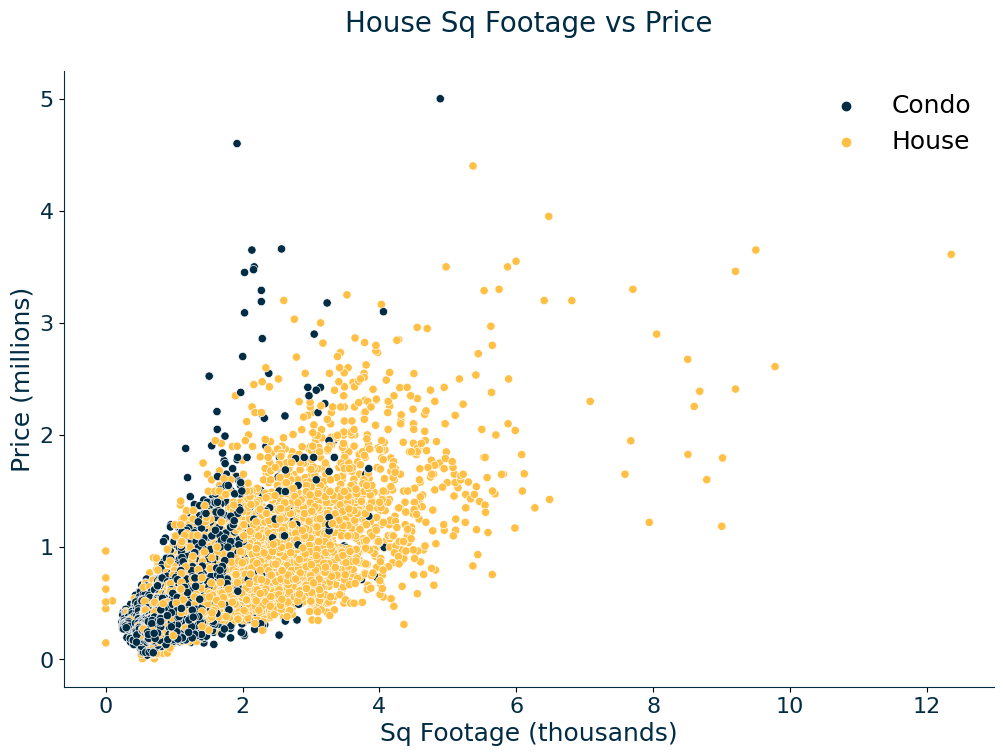

In [80]:
figure, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=prop_df, x=prop_df.Sqft/1000, y=prop_df.Price/1000000, hue='House_type', palette=['#022C43', '#FFC045'])
plt.xticks(color='#022C43', fontsize=16)
plt.yticks(color='#022C43', fontsize=16)
plt.xlabel('Sq Footage (thousands)', color='#022C43', fontsize=18)
plt.ylabel('Price (millions)', color='#022C43', fontsize=18)
plt.legend(frameon=False, facecolor='#fff', fontsize=18)
plt.title('House Sq Footage vs Price', color='#002c43', fontsize=20, y=1.05)
sns.despine()
ax.spines['left'].set_color('#022c43')
ax.spines['bottom'].set_color('#022c43')
ax.ticklabel_format(style='plain')
figure.set_alpha(0)
ax.set_facecolor('#fff')
plt.savefig('Sqft_vs_price.png', format='png', dpi=300, );

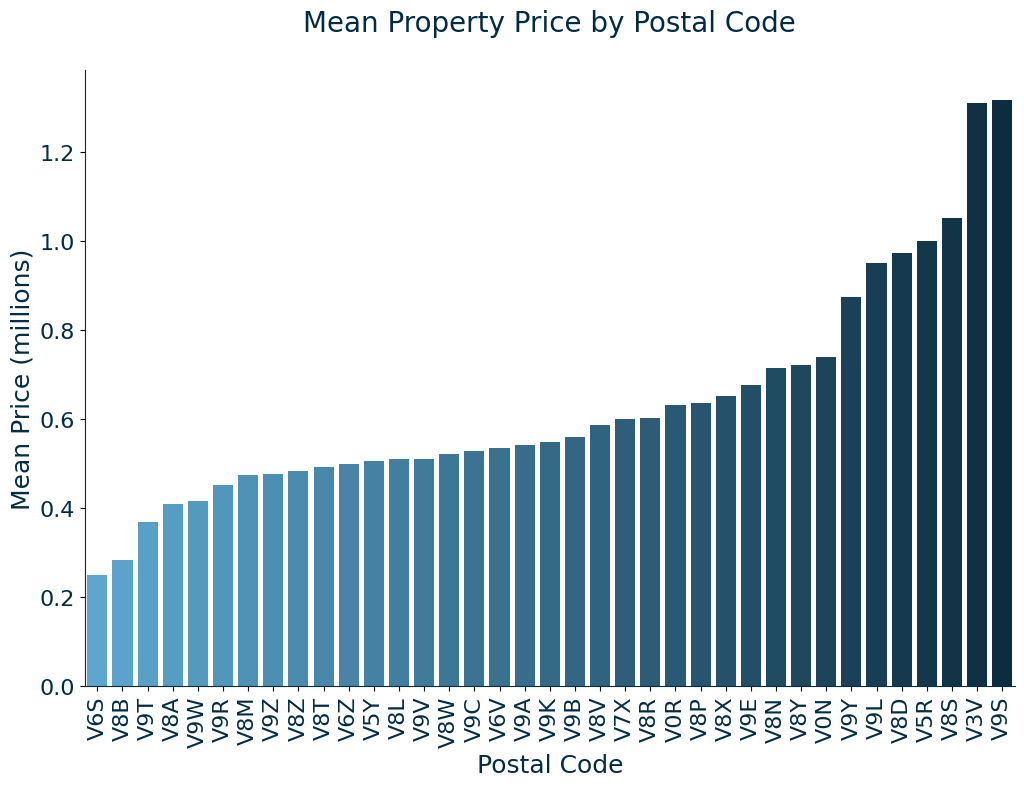

In [79]:
data = prop_df.groupby('PC').Price.mean().sort_values()
data.columns = ['Price']
figure, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=data.index, y=data/1000000, palette=color)
plt.xticks(rotation=90, color='#022C43', fontsize=16)
plt.yticks(color='#022C43', fontsize=16)
plt.xlabel('Postal Code', color='#022C43', fontsize=18)
plt.ylabel('Mean Price (millions)', color='#022C43', fontsize=18)
plt.title('Mean Property Price by Postal Code', color='#002c43', fontsize=20, y=1.05)
sns.despine()
ax.spines['left'].set_color('#022c43')
ax.spines['bottom'].set_color('#022c43')
figure.set_alpha(0)
ax.set_facecolor('#fff')
plt.savefig('PC_vs_price.png', format='png', dpi=300);


In [32]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return [mpl.colors.to_hex((1-m)*c1 + m*c2) for m in mix]

In [35]:
c1=np.array(mpl.colors.to_rgb(c1))
mpl.colors.to_hex(c1)

'#4aace1'

In [38]:
color = colorFader(c1, c2, mix_pcts)

In [3]:
import matplotlib as mpl

In [34]:
c1 = '#4AACE1'
c2 = '#022C43'

In [37]:
mix_pcts = [x/(18) for x in range(18)]

In [302]:
rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]

In [48]:
condo = prop_df[prop_df['House_type'] == 'Condo']
house = prop_df[prop_df['House_type'] == 'House']

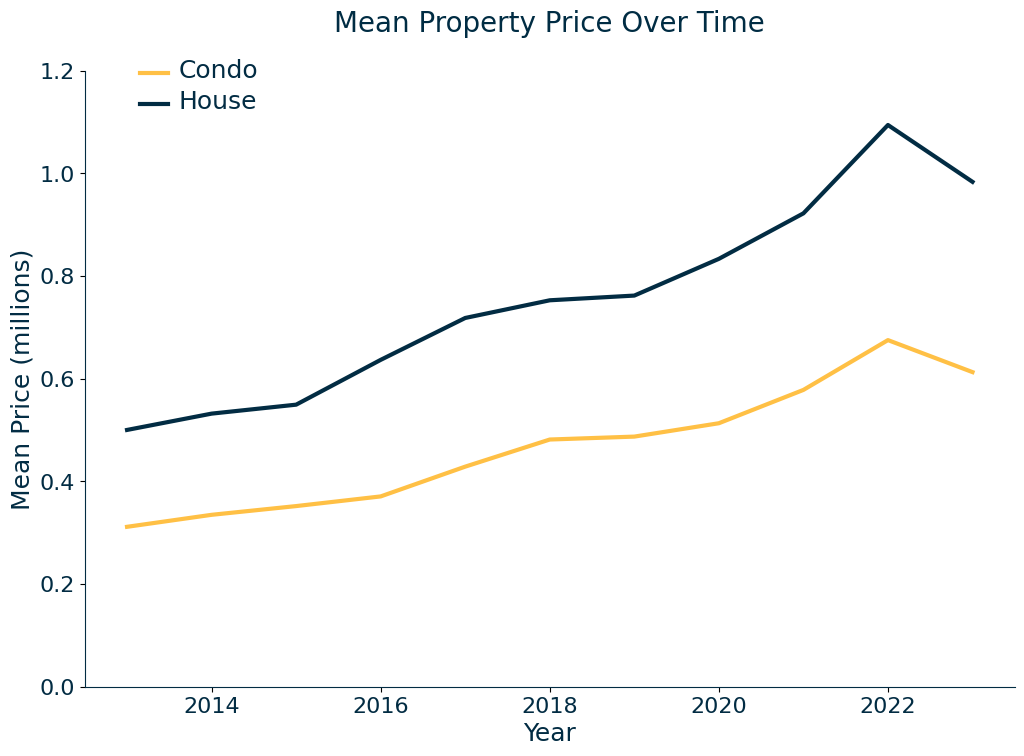

In [78]:
condo_data = np.round(condo.groupby('Year').Price.mean(), 2)
house_data = np.round(house.groupby('Year').Price.mean(), 2)
figure, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=condo_data, x=condo_data.index, y=condo_data/1000000, label='Condo', color='#FFC045', linewidth=3)
sns.lineplot(data=house_data, x=house_data.index, y=house_data/1000000, label='House', color='#022C43', linewidth=3)
plt.xlabel('Year', fontsize=18, color='#022C43')
plt.xticks(color='#022C43', fontsize=16)
plt.ylabel('Mean Price (millions)', fontsize=18, color='#022C43')
plt.yticks(color='#022C43', fontsize=16)
plt.ylim([0, 1.2])
legend = ax.legend(labelcolor='#022c43', bbox_to_anchor=(0.2, 1.04), frameon=False)
title = legend.get_title()
title.set_color('#022c43')
title.set_fontsize(16)
for text in legend.get_texts():
    text.set_fontsize(18)
ax.spines['left'].set_color('#022c43')
ax.spines['bottom'].set_color('#022c43')
ax.ticklabel_format(style='plain')
plt.title('Mean Property Price Over Time', color='#002c43', fontsize=20, y=1.05)
figure.set_alpha(0)
ax.set_facecolor('#fff')
sns.despine()
plt.savefig('Year_vs_price.png', format='png', dpi=300);